In [1]:
import numpy as np
import pandas as pd

from PIL import Image

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def apply_transform(x, transform_parameters):
    x = tf.keras.preprocessing.image.apply_affine_transform(x,
        transform_parameters.get('theta', 0),
        transform_parameters.get('tx', 0),
        transform_parameters.get('ty', 0),
        transform_parameters.get('shear', 0),
        transform_parameters.get('zx', 1),
        transform_parameters.get('zy', 1),
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        order=1
    )

    if transform_parameters.get('flip_horizontal', False):
        x = x[::-1, :, :]

    if transform_parameters.get('flip_vertical', False):
        x = x[:, ::-1, :]

    return x

In [3]:
def augment(img, 
            rotation=0,
            height_shift=0,
            width_shift=0,
            shear=0,
            zoom_x=1,
            zoom_y=1,
            flip_horizontal=0,
            flip_vertical=0):

    x = np.array(img)

    transform_parameters = {
        'theta': rotation,
        'tx': height_shift,
        'ty': width_shift,
        'shear': shear,
        'zx': zoom_x,
        'zy': zoom_y,
        'flip_horizontal': flip_horizontal,
        'flip_vertical': flip_vertical,
    }
    
    xaug = apply_transform(x, transform_parameters)
    imgaug = Image.fromarray(xaug)
    return imgaug

In [4]:
def show_augmentations(param, values, figsize=(20, 6)):
    imgs = []

    for v in values:
        im = augment(tshirt, **{param: v})
        imgs.append(im)

    plt.figure(figsize=figsize)

    n = len(values)

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(np.array(imgs[i]))
        plt.title('%s=%s' % (param, values[i]))
        plt.axis("off")

    plt.show()

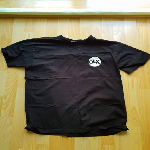

In [6]:
tshirt = Image.open('./clothing-dataset-small-master/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg')
tshirt = tshirt.resize((150, 150), resample=Image.NEAREST)
tshirt

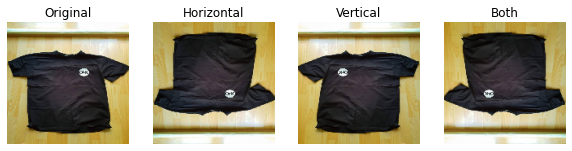

In [7]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(np.array(tshirt))
plt.title('Original')
plt.axis("off")


plt.subplot(1, 4, 2)

img = augment(tshirt, flip_horizontal=1)
plt.imshow(np.array(img))
plt.title('Horizontal')
plt.axis("off")


plt.subplot(1, 4, 3)

img = augment(tshirt, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Vertical')
plt.axis("off")


plt.subplot(1, 4, 4)

img = augment(tshirt, flip_horizontal=1, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Both')
plt.axis("off")

plt.show() 

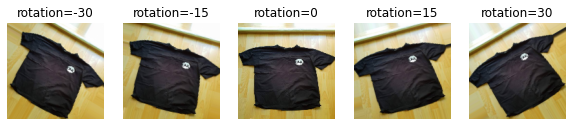

In [8]:
param = 'rotation'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

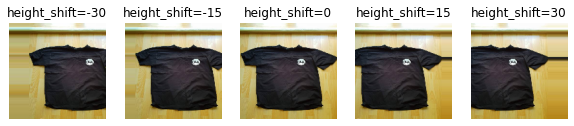

In [9]:
param = 'height_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

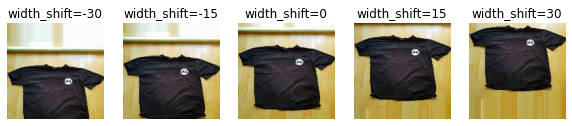

In [10]:
param = 'width_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

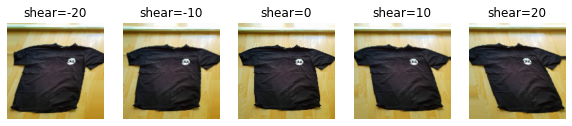

In [11]:
param = 'shear'
values = [-20, -10, 0, 10, 20]
show_augmentations(param, values, (10, 3))

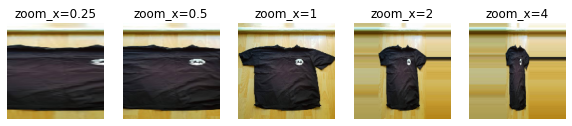

In [12]:
param = 'zoom_x'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

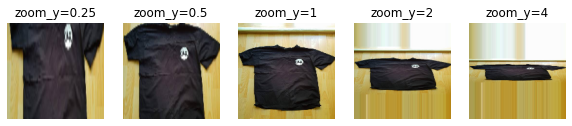

In [13]:
param = 'zoom_y'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

In [14]:
vis_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=5.0,
    height_shift_range=5.0,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

In [15]:
x = np.array(tshirt)

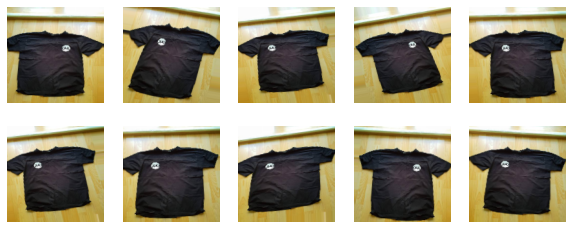

In [16]:
plt.figure(figsize=(10, 4))

for i in range(10):
    t = vis_gen.get_random_transform((150, 150))
    xaug = vis_gen.apply_transform(x, t)

    plt.subplot(2, 5, i + 1)
    plt.imshow(xaug.astype('uint8'))
    plt.axis("off")

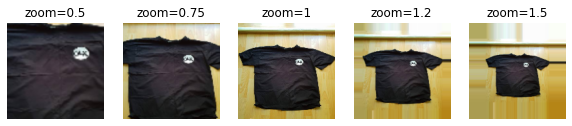

In [17]:
values = [0.5, 0.75, 1, 1.2, 1.5]

imgs = []

for v in values:
    im = augment(tshirt, zoom_y=v, zoom_x=v)
    imgs.append(im)

plt.figure(figsize=(10, 3))

n = len(values)

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(np.array(imgs[i]))
    plt.title('%s=%s' % ('zoom', values[i]))
    plt.axis("off")

plt.show()